In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math
from scipy.stats.mstats import gmean
from scipy.stats import entropy
from statsmodels.stats.weightstats import DescrStatsW
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import random_projection
from sklearn.decomposition import PCA
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sc_min = pd.read_csv('sc_min.csv', header=0, sep=',')
sc_max = pd.read_csv('sc_max.csv', header=0, sep=',')
sc_mean = pd.read_csv('sc_mean.csv', header=0, sep=',')

In [11]:
sc_mean.drop_duplicates('material', inplace=True)
sc_mean
#we can use the method drop_duplicates() to remove duplicates, but in order to get databases sc_min(mean,max), 
#the code was used:
#import pandas as pd
#import numpy as np
#sc = pd.read_csv('train.csv', header=0, sep=',') 
#sc1 = sc
#sc0_min = sc.loc[sc['material'] == sc.loc[0,'material']]
#while (sc1.shape > (0,83)):    
    #sc2 = sc1.loc[sc1['material'] == sc1.loc[0,'material']]
    #sc2.to_csv('sc2.csv', sep=',', header=True, index=False)
    #sc2 = pd.read_csv('sc2.csv', header=0, sep=',')
    #sc2.loc[0,'critical_temp']=np.min(sc2.critical_temp)#np.mean или np.max
    #sc2 = sc2[:1]                                                                                      
    #sc0_min = sc0_min.append(sc2)
    #sc1 = sc1.drop(np.where(sc1['material'] == sc1.loc[0,'material'])[0])
    #sc1.to_csv('sc1.csv', sep=',', header=True, index=False)
    #sc1 = pd.read_csv('sc1.csv', header=0, sep=',')
#sc0_min.to_csv('sc_min.csv', sep=',', header=True, index=False)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.906070,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.000000,Ba0.2La1.8Cu1O4
2,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.906070,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.500000,Ba0.1La1.9Ag0.1Cu0.9O4
3,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.906070,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.000000,Ba0.1La1.9Cu1O4
4,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.906070,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,26.666667,Ba0.15La1.85Cu1O4
5,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.906070,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.000000,Ba0.3La1.7Cu1O4
6,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.906070,20.687458,51.968828,...,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.000000,Ba0.5La1.5Cu1O4
7,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.906070,10.765639,51.968828,...,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.000000,Ba1La1Cu1O4
8,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.906070,36.451199,44.289459,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.000000,Sr0.1La1.9Cu1O4
9,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.906070,34.833160,44.289459,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,35.350000,Sr0.15La1.85Cu1O4
10,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.906070,33.215121,44.289459,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.000000,Sr0.2La1.8Cu1O4


In [12]:
sc_mean.to_csv('sc_mean.csv', sep=',', header=True, index=False)

In [15]:
df = sc_max

features = [col.split('_', 1)[-1] for col in df.columns if col.startswith('mean_')]
features = tuple(features)

feature_cols = [col for col in df.columns if col.endswith(features)] #and col not in remove_features]
feature_cols += ['number_of_elements']
target_col = 'critical_temp'

df = df[feature_cols + [target_col]]

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df


,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,number_of_elements,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.906070,31.794921,51.968828,53.622535,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,4,29.000
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.906070,36.161939,47.094633,53.979870,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,5,27.000
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.906070,35.741099,51.968828,53.656268,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,4,19.000
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.906070,33.768010,51.968828,53.639405,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,4,30.000
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.906070,27.848743,51.968828,53.588771,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,4,23.000
5,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.906070,20.687458,51.968828,53.521150,...,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,4,23.000
6,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.906070,10.765639,51.968828,53.351558,...,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,4,11.000
7,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.906070,36.451199,44.289459,52.924140,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,4,33.000
8,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.906070,34.833160,44.289459,52.533207,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,4,36.000
9,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.906070,33.215121,44.289459,52.136769,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,4,31.000


In [24]:
numb_element = df["number_of_elements"]
df_scale = scale(df)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


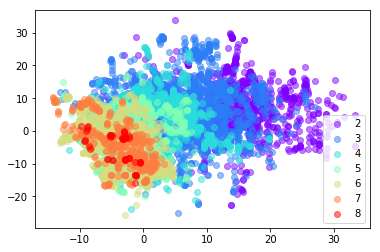

In [25]:
#Random projection
projection = random_projection.SparseRandomProjection(n_components = 2, random_state = 0)
data_2d_rp = projection.fit_transform(df_scale)

colors = cm.rainbow(np.linspace(0, 1, len(set(numb_element))))
for y, c in zip(set(df.number_of_elements), colors):
    plt.scatter(data_2d_rp[numb_element.values==y, 0], 
                data_2d_rp[numb_element.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

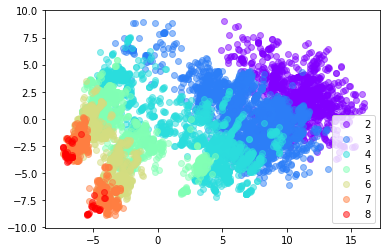

In [26]:
#PCA
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(df_scale)

colors = cm.rainbow(np.linspace(0, 1, len(set(numb_element))))
for y, c in zip(set(df.number_of_elements), colors):
    plt.scatter(data_2d_pca[numb_element.values==y, 0], 
                data_2d_pca[numb_element.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

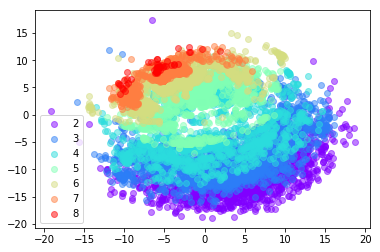

In [27]:
#MDS
mds = MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(df_scale)

colors = cm.rainbow(np.linspace(0, 1, len(set(numb_element))))
for y, c in zip(set(df.number_of_elements), colors):
    plt.scatter(data_2d_mds[numb_element.values==y, 0], 
                data_2d_mds[numb_element.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

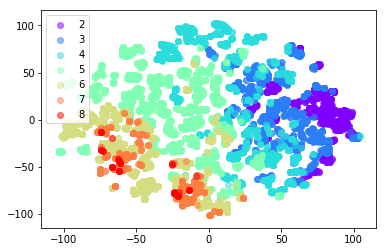

In [28]:
#TSNE
tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(df_scale)

colors = cm.rainbow(np.linspace(0, 1, len(set(numb_element))))
for y, c in zip(set(df.number_of_elements), colors):
    plt.scatter(data_2d_tsne[numb_element.values==y, 0], 
                data_2d_tsne[numb_element.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

In [29]:
# Normalize features

for col in df.columns:
    if not col.endswith(features):
        continue
    vals = df[col]
    df[col] = np.interp(vals, (vals.min(), vals.max()), (-1, +1))

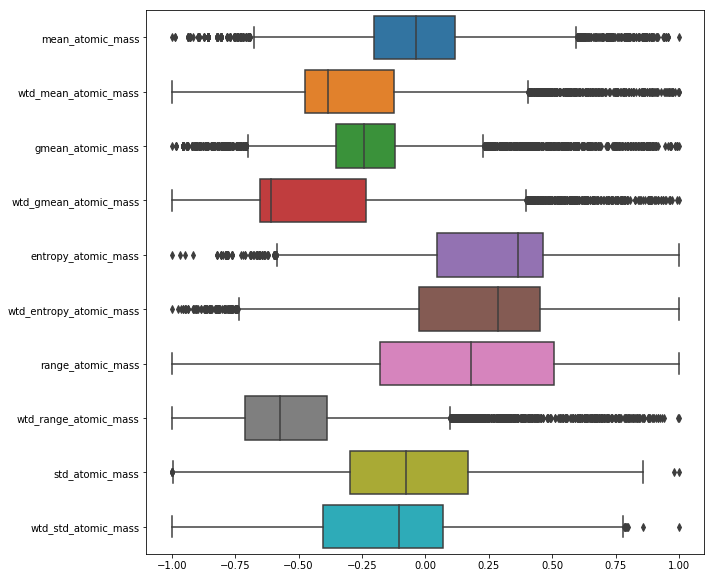

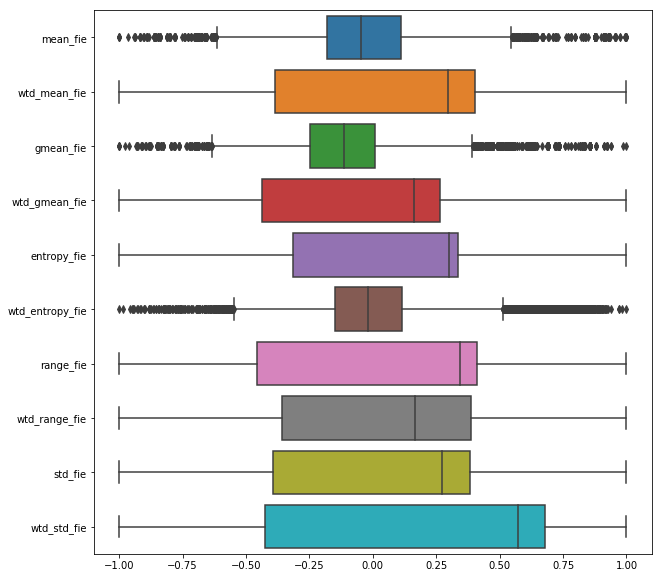

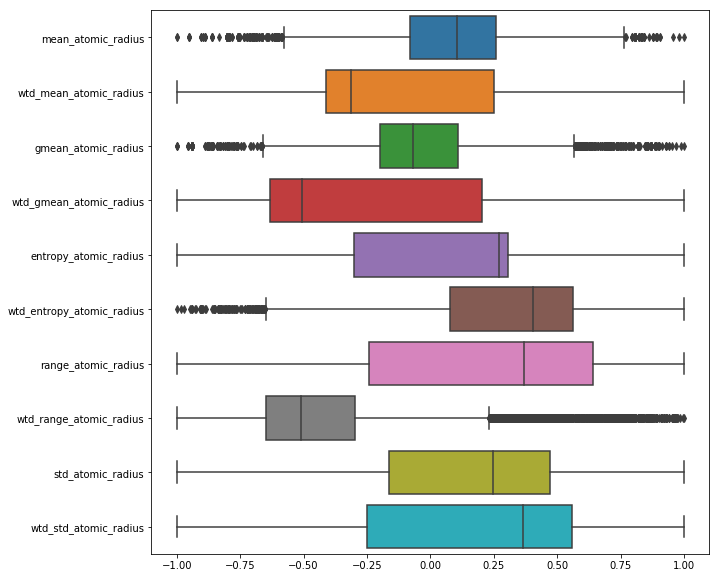

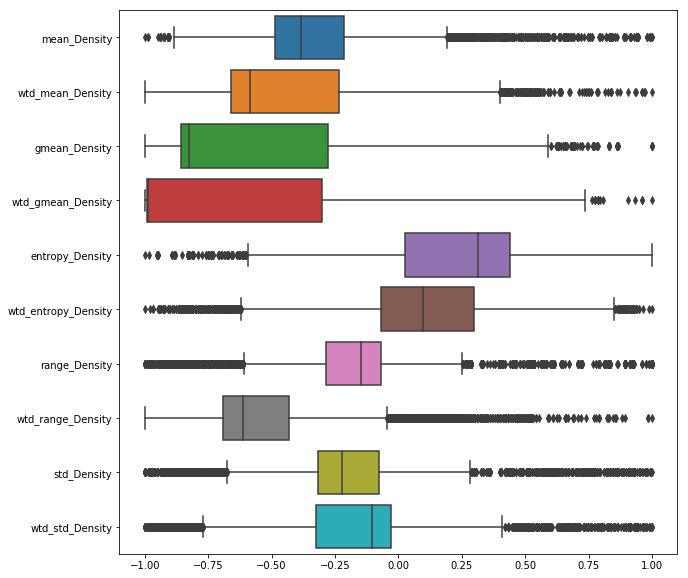

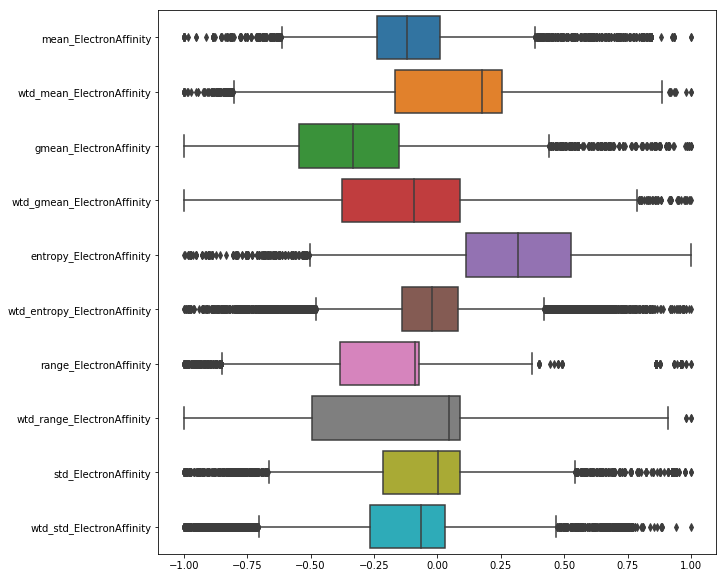

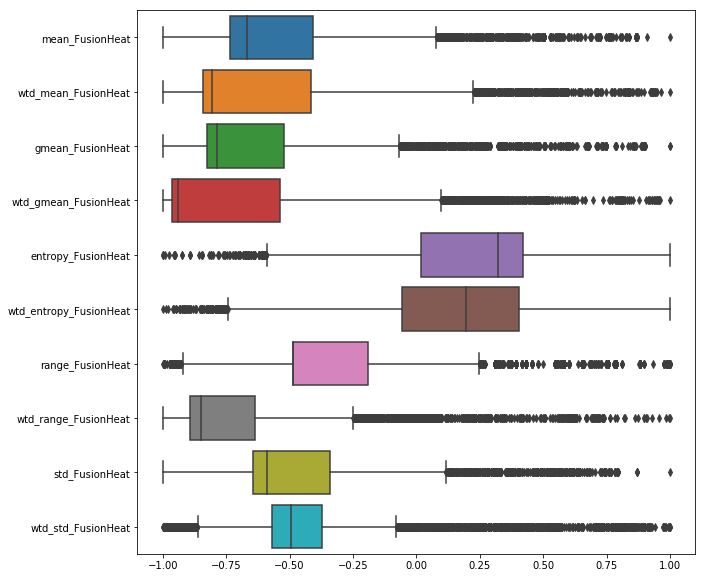

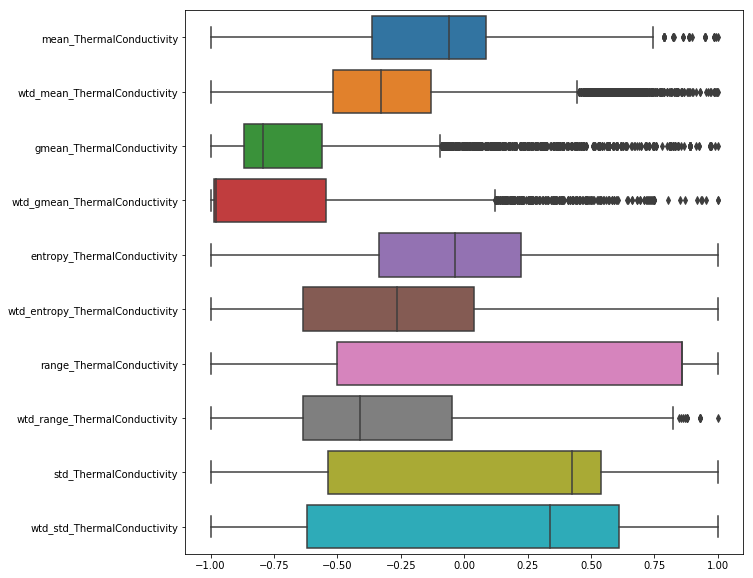

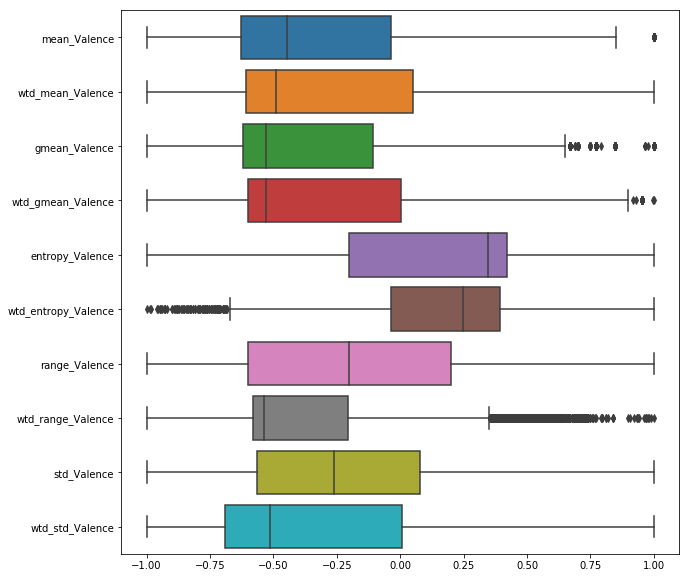

In [32]:
for feature in features:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df[[col for col in df.columns if col.endswith(feature)]],  orient='h' )